In [21]:
import subprocess
import sys

def install_requests():
    try:
        import requests
        import networkx as nx
        import matplotlib.pyplot as plt
        print("La bibliothèque 'requests' est déjà installée.")
    except ImportError:
        print("Installation de la bibliothèque 'requests'...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "requests"])
        import site
        site.main()
        print("La bibliothèque 'requests' a été installée avec succès.")
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "networkx"])

install_requests()

La bibliothèque 'requests' est déjà installée.


In [11]:
import json
import itertools
import random
import time
import requests

def load_json(filepath):
    with open(filepath, 'r', encoding='utf-8') as file:
        return json.load(file)

def save_json(filepath, data):
    with open(filepath, 'w', encoding='utf-8') as file:
        json.dump(data, file, indent=4)

def call_api(first_item, second_item):
    url = f"https://neal.fun/api/infinite-craft/pair?first={first_item}&second={second_item}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36",
        "Referer": "https://neal.fun/infinite-craft/",
        "Accept": "*/*",
        "Accept-Language": "fr-FR,fr;q=0.9",
        "authority": "neal.fun",
        "path": "/infinite-craft/pair?first={first_item}&second={second_item}",
        "Cookie": "__cf_bm=epItsNO2WWlHIc8dMUzDkR3d6t9eM3fBxPEj8XwJ1nM-1711497023-1.0.1.1-GpPQqa3r1OrL95TFaf4p6cI.db3l.9WskvSnXFT9NZ7S9XD66dXij3b7TmzIaWpef_wuptooHX22i7IXuw8fvw; cf_clearance=gw1EzdPLWmp2eGhpVSndejbCRMq9MdHCOHeBhR3BW7I-1711497024-1.0.1.1-bnYHrYkp2qbtBqhOalXXUtg_REK_WVkxnln7_PvBCueTzd_Wcz.Buncvn8bc6.DIOYUzflk6qyAxJcH7ywSUtQ; _ga=GA1.1.1827298393.1711497026; FCCDCF=%5Bnull%2Cnull%2Cnull%2C%5B%22CP8FKAAP8FKAAEsACBFRAtEoAP_gAEPgACiQINJD7D7FbSFCwH5zaLsAMAhHRsCAQoQAAASBAmABQAKQIAQCgkAQFASgBAACAAAAICZBIQIECAAACUAAQAAAAAAEAAAAAAAIIAAAgAEAAAAIAAACAAAAEAAIAAAAEAAAmAgAAIIACAAAhAAAAAAAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAQOhQD2F2K2kKFkPCmQWYAQBCijYEAhQAAAAkCBIAAgAUgQAgFIIAgAIFAAAAAAAAAQEgCQAAQABAAAIACgAAAAAAIAAAAAAAQQAAAAAIAAAAAAAAEAAAAAAAQAAAAIAABEhCAAQQAEAAAAAAAQAAAAAAAAAAABAAA%22%2C%222~2072.70.89.93.108.122.149.196.2253.2299.259.2357.311.313.323.2373.338.358.2415.415.449.2506.2526.486.494.495.2568.2571.2575.540.574.2624.609.2677.864.981.1029.1048.1051.1095.1097.1126.1205.1211.1276.1301.1365.1415.1423.1449.1570.1577.1598.1651.1716.1735.1753.1765.1870.1878.1889.1958~dv.%22%2C%227B15DAB6-A53B-4D4B-BD9B-46128697595F%22%5D%5D; __gads=ID=62f062f3c95f58f9:T=1711497059:RT=1711497059:S=ALNI_MZUVJNBWnd7LyGhD1h-AE3x1IChkw; __gpi=UID=00000d5006df8b79:T=1711497059:RT=1711497059:S=ALNI_MaIcZ-GMvSEjzIDXfNInwSUv5N9qQ; __eoi=ID=744c5a0732dbc0ab:T=1711497059:RT=1711497059:S=AA-AfjZuCIpBs8vl-zGM-oJv8ObG; _ga_L7MJCSDHKV=GS1.1.1711497026.1.0.1711497061.0.0.0; FCNEC=%5B%5B%22AKsRol8nQM0xl9w9XYEPmpPNaxCqnkp73oE6m1yQGo2TOXZymDkMWHlXx_WHOdOoYqV8w72j2mrCk1TjHFTrKl4n8hjAHbDlsF3IuiLP_BF5dVCyaPSOPU1nzmSLq-zRggOnEnl5amMQB2ew1lQN8YfaxjzYwznzlQ%3D%3D%22%5D%5D"
        }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        try:
            return response.json()
        except json.JSONDecodeError:
            print(f"Erreur de décodage JSON : {response.text}")
            return None
    else:
        time.sleep(2)
        print(f"Erreur de requête : Statut {response.status_code}, Réponse : {response.text}")
        return None


def main():
    items_data = load_json('./items.json')
    items = items_data['items']
    crafts_data = load_json('./crafts.json')
    
    # Convert crafts_data to a dictionary for easier access
    crafts_dict = {key: value for craft in crafts_data['crafts'] for key, value in craft.items()}
    
    item_names = [item['result'] for item in items]
    random.shuffle(item_names)
    tried_combinations = set()  # To keep track of combinations we've already tried
    
    # Populate initial tried combinations from crafts_dict
    for combinations in crafts_dict.values():
        for combo in combinations:
            tried_combinations.add(tuple(sorted(combo)))
    
    all_combos = list(itertools.combinations_with_replacement(item_names, 2))
    random.shuffle(all_combos)

    for combo in all_combos:
        sorted_combo = tuple(sorted([combo[0].lower(), combo[1].lower()])) # 
        if sorted_combo in tried_combinations:
            continue  # Skip this combination if we've already tried it
        tried_combinations.add(sorted_combo)
        
        first, second = combo
        result = call_api(first, second)
        
        if result is None:
            continue
        
        # Check if the result is a new item or a new craft
        item_updated = False
        craft_updated = False
        
        if result['result'].lower() not in [name.lower() for name in item_names]:
            items.append({"result": result['result'], "emoji": result['emoji'], "isNew": result['isNew']})
            item_names.append(result['result'])  # Update the item_names list
            item_updated = True
            print(f"New item discovered and saved: {first} + {second} = {result['result']} ({result['emoji']})")
            if result['isNew']:
                print("This item is marked as new!!!!")

        if result['result'].lower() in crafts_dict:
            if [first.lower(), second.lower()] not in crafts_dict[result['result'].lower()]:
                crafts_dict[result['result'].lower()].append([first.lower(), second.lower()])
                craft_updated = True
        else:
            crafts_dict[result['result'].lower()] = [[first.lower(), second.lower()]]
            craft_updated = True

        if item_updated:
            # Save items if there was an update
            save_json('./items.json', {"items": items})

        if craft_updated:
            # Reconstruct the crafts list from crafts_dict for saving if there was an update
            new_crafts = [{key: value} for key, value in crafts_dict.items()]
            save_json('./crafts.json', {"crafts": new_crafts})
    
    print("Update completed.")

if __name__ == "__main__":
    try:
        main()
    except KeyboardInterrupt:
        print("Interruption de l'utilisateur.")




New item discovered and saved: Breeze + Mount Rushmore = Washington (🌲)
New item discovered and saved: Diarrhea + Electric Kett = Electric Diarrhea (💩)
New item discovered and saved: Cereal Gladiator + S’more Golem = Cereal Golem (🥣🧟‍♂)
Interruption de l'utilisateur.


In [12]:
def get_craft_for_item(item_name, crafts_filepath='./crafts.json'):
    crafts_data = load_json(crafts_filepath)
    for craft in crafts_data['crafts']:
        if item_name.lower() in craft:
            return craft[item_name.lower()]
    
    return "No crafts found for this item."


In [13]:
def get_statistics(items_filepath='./items.json', crafts_filepath='./crafts.json'):
    items_data = load_json(items_filepath)
    crafts_data = load_json(crafts_filepath)
    
    num_items = len(items_data['items'])
    num_crafts = sum(len(craft.values()) for craft in crafts_data['crafts'])
    
    return {
        "number_of_items": num_items,
        "number_of_crafts": num_crafts
    }


In [14]:
stats = get_statistics()
print(f"Number of Items: {stats['number_of_items']}")
print(f"Number of Crafts: {stats['number_of_crafts']}")

item_crafts = get_craft_for_item("computer")
print(f"Crafts for 'water': {item_crafts}")


Number of Items: 3278
Number of Crafts: 3278
Crafts for 'water': [['steam', 'chip'], ['steam', 'tablet'], ['exhaust', 'chip'], ['chip', 'umpire']]


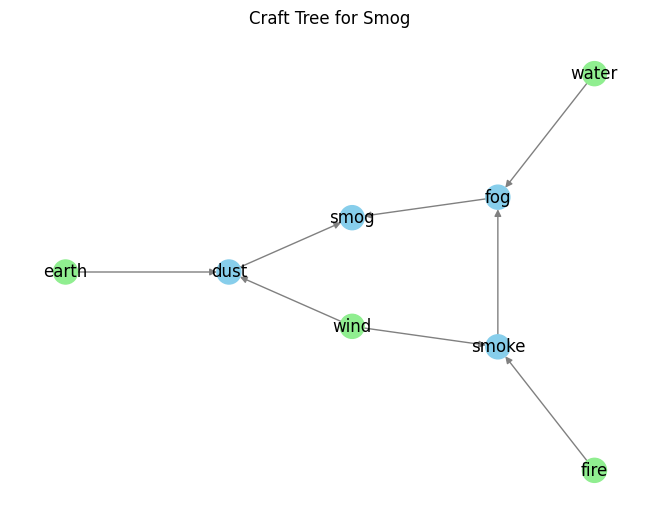

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

crafts_data = load_json('./crafts.json')
base_items = ["water", "fire", "wind", "earth"]

def build_craft_graph(crafts_data):
    G = nx.DiGraph()
    for craft in crafts_data["crafts"]:
        for result, ingredients in craft.items():
            for ingredient in ingredients[0]:  # Prend le premier ensemble d'ingrédients
                G.add_edge(ingredient, result)
    return G

def plot_craft_tree_filtered(graph, target_item, base_items):
    # Initialize a new graph to hold the filtered crafting tree
    filtered_graph = nx.DiGraph()

    # Define a recursive function to add nodes and edges for the target item and its dependencies
    def add_dependencies_to_graph(current_item):
        # Base case: if the current item is a base item, just add the node and return
        if current_item in base_items:
            filtered_graph.add_node(current_item)
            return
        # Add the current item node
        filtered_graph.add_node(current_item)
        # Iterate through the predecessors (ingredients) of the current item
        for pred in graph.predecessors(current_item):
            # Add the node and edge from the ingredient to the current item
            filtered_graph.add_node(pred)
            filtered_graph.add_edge(pred, current_item)
            # Recursively add dependencies for the ingredient
            add_dependencies_to_graph(pred)

    # Start building the filtered graph from the target item
    add_dependencies_to_graph(target_item)

    # Now, plot the filtered graph
    pos = nx.spectral_layout(filtered_graph)
    node_colors = ["lightgreen" if n in base_items else "skyblue" for n in filtered_graph.nodes()]
    nx.draw(filtered_graph, pos, with_labels=True, node_color=node_colors, edge_color='gray')
    plt.title(f"Craft Tree for {target_item.capitalize()}")
    plt.show()
    
target_item = "smog".lower()  # Exemple d'objet cible
craft_graph = build_craft_graph(crafts_data)
plot_craft_tree_filtered(craft_graph, target_item, base_items)

In [19]:
def print_crafting_path(crafts_data, item, depth=0):
    # Check if the item is a base item
    if item in base_items:
        print("    " * depth + item)
        return

    # Find the recipe for the current item
    for craft in crafts_data["crafts"]:
        if item in craft:
            ingredients = craft[item][0]  # Assume each item has only one crafting recipe
            print("    " * depth + item + ":")
            for ingredient in ingredients:
                # Recursively print the crafting path for each ingredient
                print_crafting_path(crafts_data, ingredient, depth + 1)
            break  # Once the item is found and processed, break out of the loop

print_crafting_path(crafts_data, target_item)


smog:
    dust:
        wind
        earth
    fog:
        water
        smoke:
            fire
            wind


In [17]:
import plotly.graph_objects as go
import networkx as nx

def plotly_interactive_graph(graph, target_item, base_items):
    # Position nodes using the spring layout
    pos = nx.spring_layout(graph)

    # Create edge traces
    edge_x = []
    edge_y = []
    for edge in graph.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)  # Prevents drawing a line to the next edge in the list
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)
    
    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')
    
    # Create node traces
    node_x = []
    node_y = []
    node_text = []
    for node in graph.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(node)
    
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='text',
        text=node_text,
        marker=dict(
            showscale=False,
            # color scale options
            color=['lightgreen' if node in base_items else 'skyblue' for node in graph.nodes()],
            size=10,
            line_width=2))

    # Create figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=0),
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )

    fig.show()

# Example usage
plotly_interactive_graph(craft_graph, target_item, base_items)
